# notebook per l'inferenza, bozza

In [ ]:
from pathlib import Path
import sys

sys.path.append(str(Path("./HaMMon-ML-digital-twin").resolve()))

import torch

from src.patcher import Patcher
from src.predict import Predict

In [36]:
from models.att_unet import sAttU_Net
from datasets.public_cracks import Dataset

In [37]:
from src.imgs import Img
img = Img(Dataset)

In [38]:
model = sAttU_Net(output_ch=1)
weights = torch.load("./weights/007-sattunet-pc1-c50.pth")

In [39]:
model.load_state_dict(weights['data'])
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(' ')

# set the file path

In [46]:
file_path = 'put-your-image-path-here.jpg'

# file_path = '/media/mauro/Data/Datasets/public-cracks/DeepCrack/test/imgs/test11215-5.jpg'
# file_path = '/home/mauro/Downloads/e10221.jpg'
file_path = '/home/mauro/Downloads/DJI_20250308100657_0850_D.JPG'
# file_path = '/home/mauro/Downloads/DJI_20241014153158_0169_D.jpg'

file_path = Path(file_path)
assert file_path.exists(), f"File {file_path} does not exist."

In [47]:
input = Dataset.load_img(file_path)
transform = Dataset.transform()
input = transform(input)
input = input.unsqueeze(0).to(device)
print(input.shape)

torch.Size([1, 3, 3024, 4032])


In [48]:

predict = Predict(kind='binary_predictions', threshold=0.1)

patcher = Patcher(model=model, 
                  kernel=(512, 512), 
                  stride=(500, 500), 
                  device=device, 
                  mode='average', 
                  predict=predict, 
                  debug=True, # True to visualize patches
                  ) 
#patcher.compute_batch_layout((3,2,1408,704))

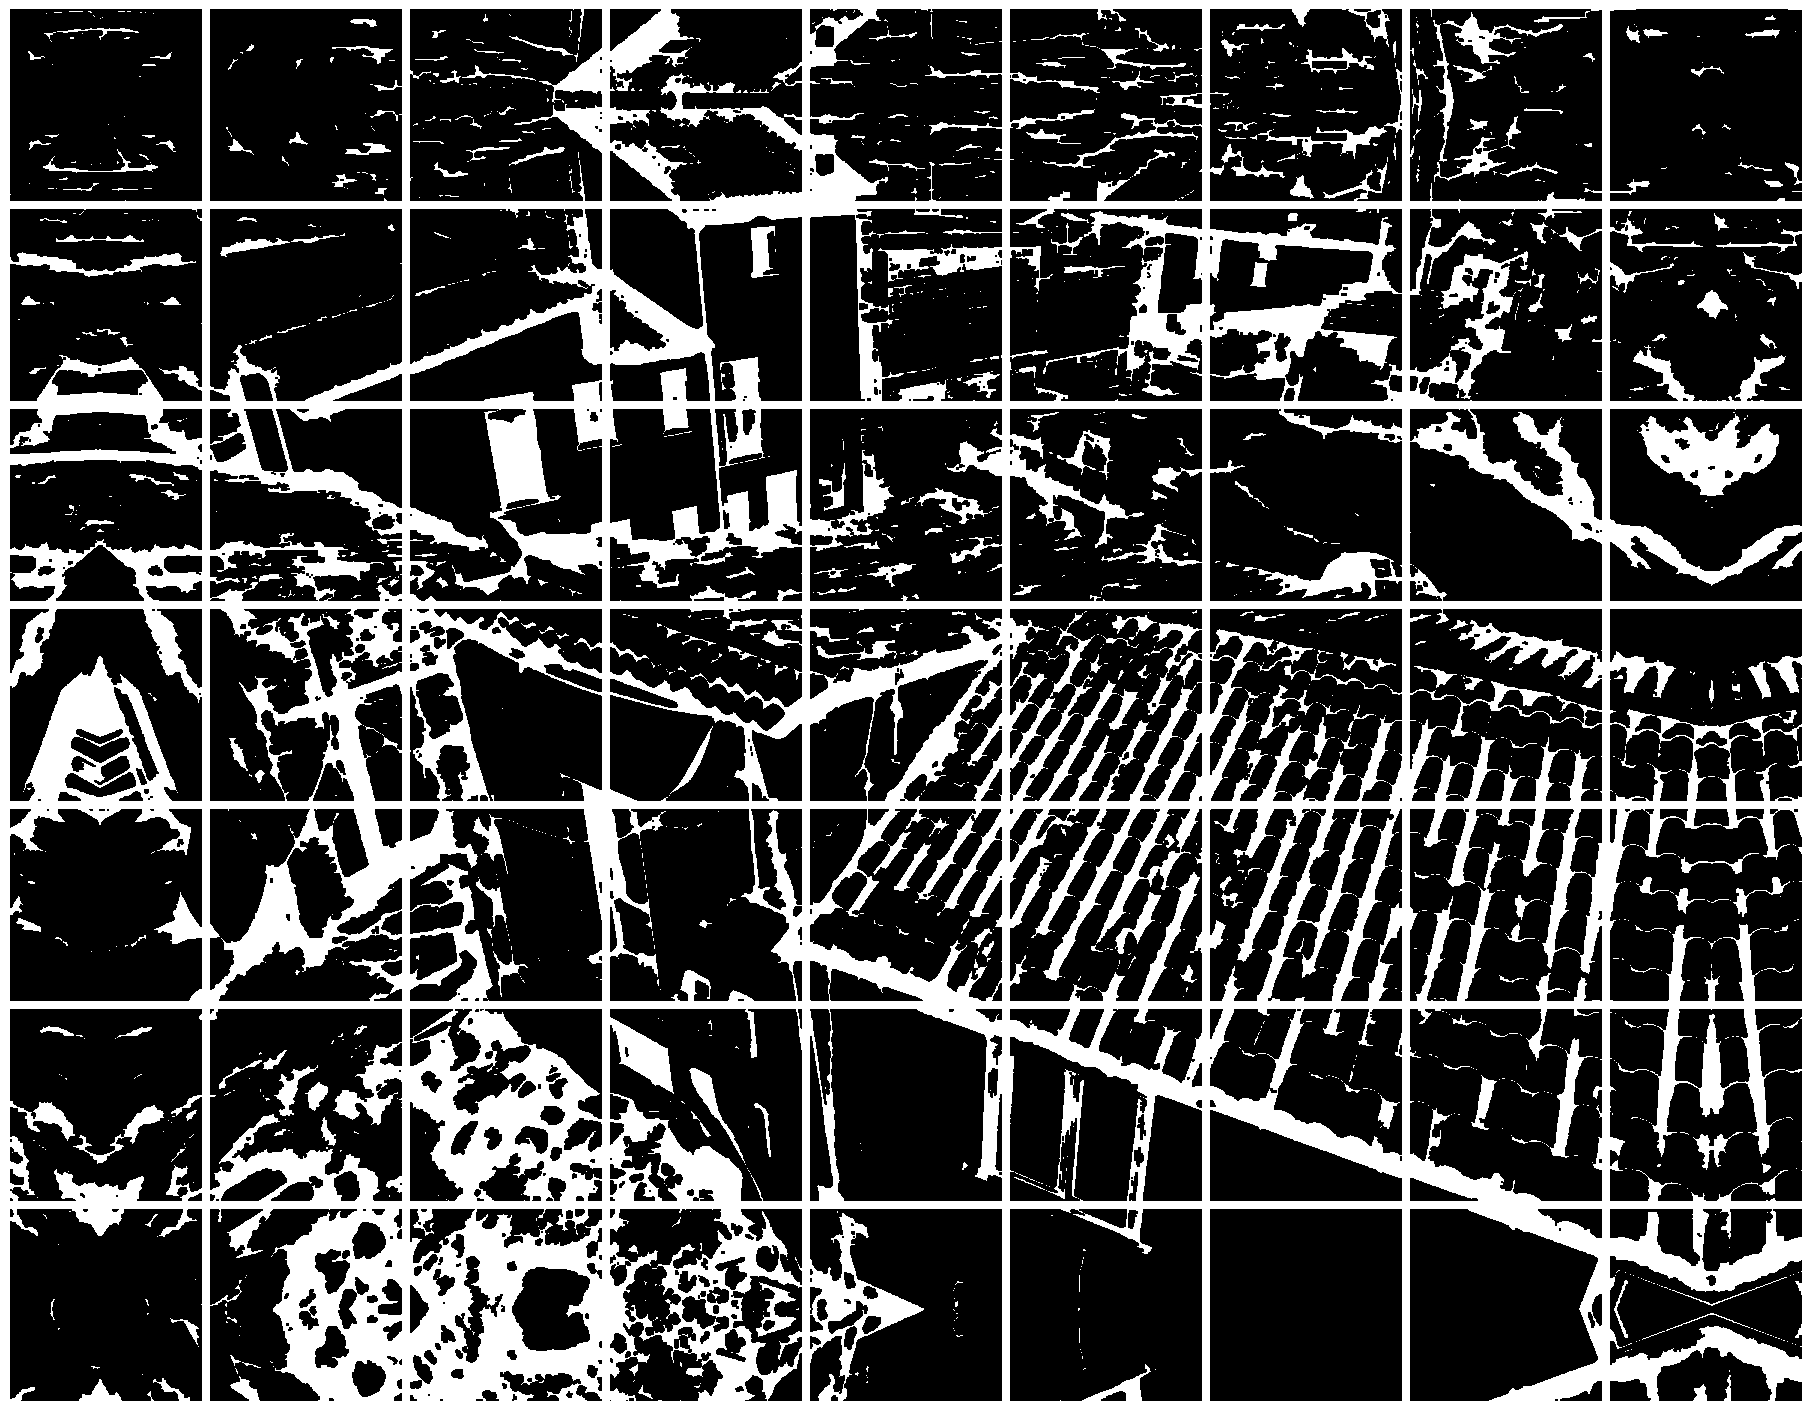

(torch.Tensor,
 torch.Size([1, 1, 3024, 4032]),
 tensor(0., device='cuda:0'),
 tensor(1., device='cuda:0'))

In [49]:
with torch.no_grad():
    output = patcher(input)
    output = predict(output=output)
    
    
type(output), output.shape, output.min(), output.max()

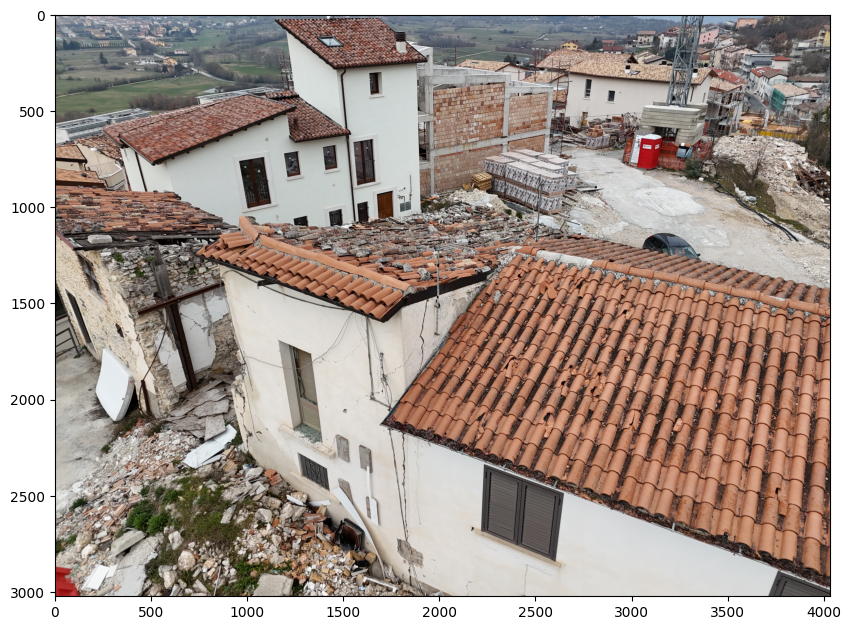

In [50]:
img_np = img.img_to_np(input.squeeze(0))
img.view_np(img_np)

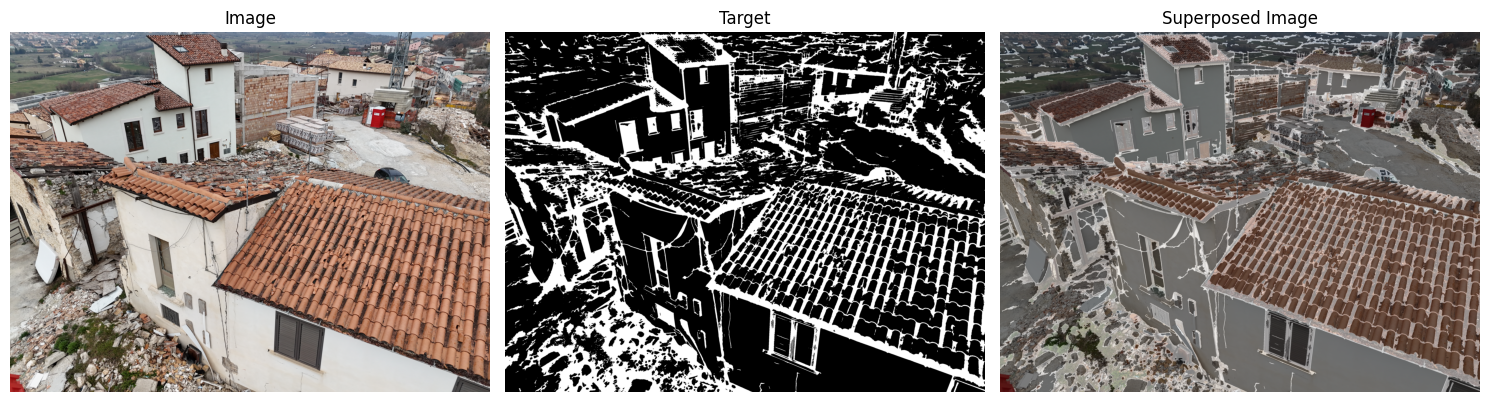

In [51]:
nnp = img.label_to_np(output[0].squeeze(0))


img.visualize_images_with_superposition(img.img_to_np(input.squeeze(0)), nnp)